# Preparing Data For LSTM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [3]:
#usecols = [1], just use 1st columns 
df = pd.read_csv('international-airline-passengers.csv', usecols=[1])
df.describe()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [4]:
#fetch values from dataframe
values = df.values.astype('float32')
values.shape

(144, 1)

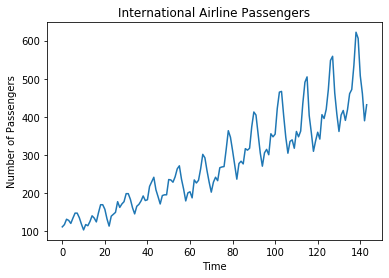

In [5]:
# Let's take a look our new data.
plt.plot(values)
plt.xlabel("Time")
plt.ylabel("Number of Passengers")
plt.title("International Airline Passengers")
plt.show()

# Split into Train and Test Set

In [6]:
train_size = int((values.shape[0] * 0.67))  # 2/3rd as training data
test_size = values.shape[0]  - train_size
train = values[0:train_size]
test = values[train_size:]

# Feature Scaling using MinMaxScaler

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range =(0,1))  # scale in range of 0 to 1
train = scaler.fit_transform(train)
test = scaler.transform(test)

# Create dataset (window size k(lookback) and next value as the output)

In [8]:
def create_dataset(data, k):
    dataX, dataY = [],[]
    for i in range(data.shape[0] - k):
        x = data[i:i + k, 0]
        y = data[i + k, 0]
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

In [9]:
look_back = 12
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [10]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
print(trainX.shape)
testX.shape

(84, 12, 1)


(36, 12, 1)

# Setting up the LSTM Model

In [17]:
model=Sequential()
model.add(LSTM(100,input_shape=(look_back,1)))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',metrics = ['mse'])
history = model.fit(trainX, trainY, epochs=100, batch_size = 1,verbose=1)

Epoch 1/100
84/84 [==============================] - 2s 27ms/step - loss: 0.0375 - mse: 0.0375
Epoch 2/100
84/84 [==============================] - 1s 15ms/step - loss: 0.0303 - mse: 0.0303
Epoch 3/100
84/84 [==============================] - 1s 14ms/step - loss: 0.0247 - mse: 0.0247
Epoch 4/100
84/84 [==============================] - 1s 13ms/step - loss: 0.0180 - mse: 0.0180
Epoch 5/100
84/84 [==============================] - 1s 13ms/step - loss: 0.0257 - mse: 0.0257
Epoch 6/100
84/84 [==============================] - 1s 14ms/step - loss: 0.0163 - mse: 0.0163
Epoch 7/100
84/84 [==============================] - 1s 14ms/step - loss: 0.0189 - mse: 0.0189
Epoch 8/100
84/84 [==============================] - 1s 14ms/step - loss: 0.0152 - mse: 0.0152
Epoch 9/100
84/84 [==============================] - 1s 13ms/step - loss: 0.0194 - mse: 0.0194
Epoch 10/100
84/84 [==============================] - 1s 13ms/step - loss: 0.0181 - mse: 0.0181
Epoch 11/100
83/84 [============================>

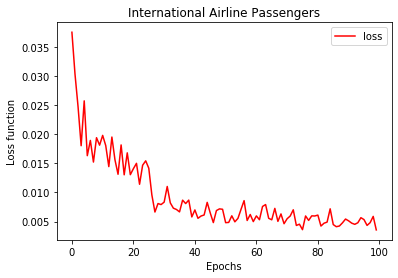

In [18]:
# plot metrics
plt.plot(history.history['loss'],label='loss',color='red')
plt.xlabel("Epochs")
plt.ylabel("Loss function")
plt.title("International Airline Passengers")
plt.legend()
plt.show()

# Analysing the Output

In [19]:
# Remember, we scaled datas between 0 and 1 but now we're at the end of the project.
# So we should inverse transform datas.
testPredict = model.predict(testX)
testPredict = scaler.inverse_transform(testPredict).ravel()

trainPredict = model.predict(trainX)
trainPredict = scaler.inverse_transform(trainPredict).ravel()

trainTrue = scaler.inverse_transform([trainY]).ravel()
testTrue = scaler.inverse_transform([testY]).ravel()

testPredict.shape, testTrue.shape

((36,), (36,))

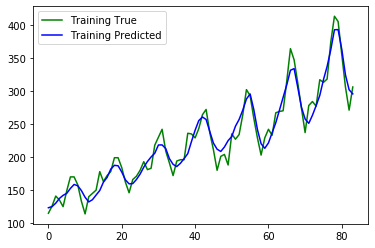

In [20]:
plt.plot(trainTrue, label = 'Training True', c = 'g')
plt.plot(trainPredict, label = 'Training Predicted', c = 'b')
plt.legend()
plt.show()

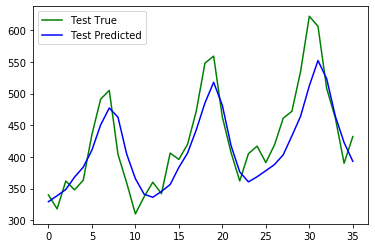

In [21]:
plt.plot(testTrue, label = 'Test True', c = 'g')
plt.plot(testPredict, label = 'Test Predicted', c = 'b')
plt.legend()
plt.show()

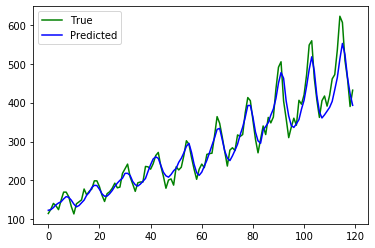

In [22]:
combinedPredicted = np.concatenate((trainPredict, testPredict))
combinedTrue = np.concatenate((trainTrue, testTrue))
plt.plot(combinedTrue, label = 'True', c = 'g')
plt.plot(combinedPredicted, label = 'Predicted', c = 'b')
plt.legend()
plt.show()

In [23]:
trainscore=math.sqrt(mean_squared_error(trainY,trainPredict))
print('Train Score: %.2f MSE' % (trainscore))
testscore=math.sqrt(mean_squared_error(testY,testPredict))
print('Test Score: %.2f MSE' % (testscore))

Train Score: 234.55 MSE
Test Score: 416.83 MSE


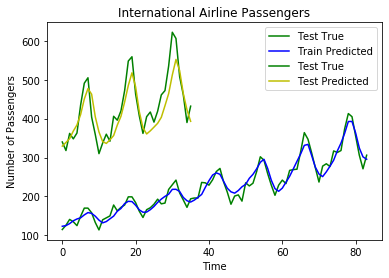

In [24]:
# Final Graph
plt.plot(trainTrue, label = 'Test True', c = 'g')
plt.plot(trainPredict, label = 'Train Predicted', c = 'b')

testTrue
plt.plot(testTrue, label = 'Test True', c = 'g')
plt.plot(testPredict, label = 'Test Predicted', c = 'y')
plt.xlabel("Time")
plt.ylabel("Number of Passengers")
plt.title("International Airline Passengers")
plt.legend()
plt.show()